33


1000it [25:28,  1.53s/it]


[<rdkit.Chem.rdchem.Mol object at 0x16dadc510>, <rdkit.Chem.rdchem.Mol object at 0x16dadee30>, <rdkit.Chem.rdchem.Mol object at 0x16dadcc10>, <rdkit.Chem.rdchem.Mol object at 0x16dadd8c0>, <rdkit.Chem.rdchem.Mol object at 0x16dadcd60>, <rdkit.Chem.rdchem.Mol object at 0x16dadcf90>, <rdkit.Chem.rdchem.Mol object at 0x16dadccf0>]


[08:41:22] Initializing MetalDisconnector
[08:41:22] Running MetalDisconnector
[08:41:22] Initializing Normalizer
[08:41:22] Running Normalizer
[08:41:22] Running LargestFragmentChooser
[08:41:22] Running Normalizer
[08:41:22] Running Uncharger
[08:41:22] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 27 28 29 30
[08:41:22] Initializing MetalDisconnector
[08:41:22] Running MetalDisconnector
[08:41:22] Initializing Normalizer
[08:41:22] Running Normalizer
[08:41:22] Running LargestFragmentChooser
[08:41:22] Running Normalizer
[08:41:22] Running Uncharger
[08:41:22] Explicit valence for atom # 23 C, 5, is greater than permitted
[08:41:22] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 27
[08:41:22] Initializing MetalDisconnector
[08:41:22] Running MetalDisconnector
[08:41:22] Initializing Normalizer
[08:41:22] Running Normalizer
[08:41:22] Running LargestFragmentChooser
[08:41:22] Running Normalizer
[08:41:22] Running Uncharger
[08:41:22] Initializing MetalDisconnector
[08:4

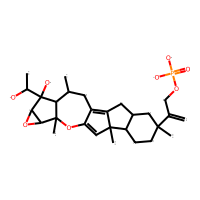

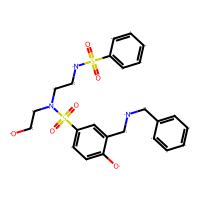

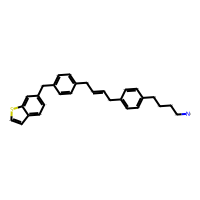

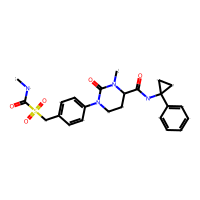

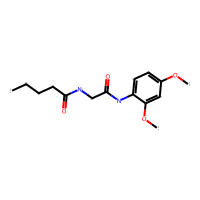

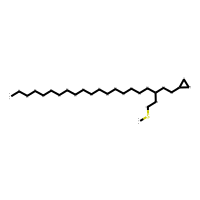

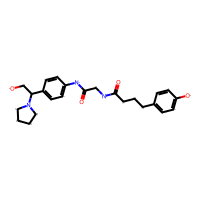

37


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.5629959019966867
35


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.6561336752419555
31


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.7078368853834536
34


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.5661007765938234
21


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.6590648755597209
28


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.7180802647910633
31


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Shape Tanimoto - 0.6392972391538185


In [7]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw

def exact_match(mol, source):
    sample_inchi = Chem.MolToInchi(mol)

    with open(source, "r") as f:
        lines = f.readlines()
        for line in lines:
            cid, inchi = line.replace("\n", "").split('\t')
            if sample_inchi == inchi:
                return True

    return False
    
device = "cpu"
generator = MLConformerGenerator(device=device)
source_path = "./full_15_39_atoms_conf_chembl.inchi"

ref_mol = Chem.MolFromMolFile("test_1.mol")
print(ref_mol.GetNumAtoms())
# rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=10, variance=5)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    print(Chem.MolFromMolBlock(sample['mol_block']).GetNumAtoms())
    view = py3Dmol.view(width=400, height=300)
    view.addModel(sample['mol_block'], 'mol')
    view.addModel(Chem.MolToMolBlock(ref_mol), 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()
    view.show()
    print(f"Shape Tanimoto - {sample['shape_tanimoto']}")